In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tweet-sentiment-analysis-ssn/train.csv
/kaggle/input/tweet-sentiment-analysis-ssn/test.csv
/kaggle/input/glove-embeddings-100d/glove.6B.100d.txt


In [2]:
#!pip uninstall -y gensim smart_open

In [3]:
# Install specific compatible versions of gensim and smart_open
#!pip install gensim==4.1.0 smart_open==5.2.1

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('/kaggle/input/tweet-sentiment-analysis-ssn/train.csv', encoding='latin1')
#data.index = data["UserName"]
df = df[["UserName", "OriginalTweet", "Sentiment"]]

# Encode the sentiment labels
label_encoder = LabelEncoder()
df['SentimentNumeric'] = label_encoder.fit_transform(df['Sentiment'])
df.head()

,UserName,OriginalTweet,Sentiment,SentimentNumeric
0,3799,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,3
1,3800,advice Talk to your neighbours family to excha...,Positive,4
2,3801,Coronavirus Australia: Woolworths to give elde...,Positive,4
3,3802,My food stock is not the only one which is emp...,Positive,4
4,3803,"Me, ready to go at supermarket during the #COV...",Extremely Negative,0


In [5]:
# Data is nonsense because this is a helpful tweet
# however marked extremely negative
print(df.iloc[4]['OriginalTweet'])
df.iloc[4]['Sentiment']





#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n


'Extremely Negative'

In [6]:
# Review a sample of tweets marked as 'extremely negative'
extremely_negative_tweets = df[df['Sentiment'] == 'Extremely Negative']['OriginalTweet'].sample(10)
for tweet in extremely_negative_tweets:
    print(f"Tweet: {tweet}\n")




Prices for basic #food staples are rising in #Africa, as #consumers stock on essentials and #sellers seek #profits amid the coronavirus scare. Across the contÂhttps://t.co/HIfVQ4H9Gq

Tweet: As increasing unemployment leads to increasing food insecurity it is left to emergency food organizations to keep people fed We need to consider the underlying causes of why people are food insecure and how this can be addressed at a policy level

Tweet: Please remain vigilant and report suspected fraud schemes involving COVID-19 by calling the National Center for Disaster Fraud hotline, 1-866-720-5721, or emailing disaster@leo.gov. More information on how to avoid coronavirus related scams: https://t.co/hlSRuwL8SR


#Covid_19

Tweet: COVID 19 economic impact checks will be delivered based on 2018 2019 tax return information so no action is required for most people If you ve received your refunds via check in the past a check will be mailed to you There is no need to pre qualify

Tweet: Even in 

In [7]:
import re
s = "String. With. puntuation?"
s = re.sub(r'[^\w\s]','',s)
print(s)

# Define the function to clean text
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove usernames
    text = re.sub(r'@\w+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Apply the function to the 'OriginalTweet' column
df['TweetCleaned'] = df['OriginalTweet'].apply(clean_text)

# Print the cleaned DataFrame
print(df.head)

String With puntuation
<bound method NDFrame.head of        UserName                                      OriginalTweet  \
0          3799  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...   
1          3800  advice Talk to your neighbours family to excha...   
2          3801  Coronavirus Australia: Woolworths to give elde...   
3          3802  My food stock is not the only one which is emp...   
4          3803  Me, ready to go at supermarket during the #COV...   
...         ...                                                ...   
41152     44951  Airline pilots offering to stock supermarket s...   
41153     44952  Response to complaint not provided citing COVI...   
41154     44953  You know itÂs getting tough when @KameronWild...   
41155     44954  Is it wrong that the smell of hand sanitizer i...   
41156     44955  @TartiiCat Well new/used Rift S are going for ...   

                Sentiment  SentimentNumeric  \
0                 Neutral                 3   
1           

In [8]:
# Where I found this great tokenizer
# https://huggingface.co/learn/nlp-course/en/chapter2/4
import nltk
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

sentence2 = "Using a Transformer network is simple"

sentence = "Can this sentence be tokenized with the word don't in it? #NLP!"
print(tokenizer.tokenize(sentence))

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

['Can', 'this', 'sentence', 'be', 'token', '##ized', 'with', 'the', 'word', 'don', "'", 't', 'in', 'it', '?', '#', 'NL', '##P', '!']


In [9]:
# Apply the tokenizer to each tweet
df['TokenizedTweet'] = df['TweetCleaned'].apply(tokenizer.tokenize)

# Print the tokenized tweets
print(df[['OriginalTweet', 'TokenizedTweet']])

                                           OriginalTweet  \
0      @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...   
1      advice Talk to your neighbours family to excha...   
2      Coronavirus Australia: Woolworths to give elde...   
3      My food stock is not the only one which is emp...   
4      Me, ready to go at supermarket during the #COV...   
...                                                  ...   
41152  Airline pilots offering to stock supermarket s...   
41153  Response to complaint not provided citing COVI...   
41154  You know itÂs getting tough when @KameronWild...   
41155  Is it wrong that the smell of hand sanitizer i...   
41156  @TartiiCat Well new/used Rift S are going for ...   

                                          TokenizedTweet  
0                                             [and, and]  
1      [advice, Talk, to, your, neighbours, family, t...  
2      [Co, ##rona, ##virus, Australia, W, ##ool, ##w...  
3      [My, food, stock, is, not, the, only

In [10]:
# Load GloVe embeddings
def load_glove_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

# Path to the uploaded GloVe file
glove_file_path = '/kaggle/input/glove-embeddings-100d/glove.6B.100d.txt'
glove_vectors = load_glove_embeddings(glove_file_path)

In [11]:
embedding_dim = 100
def get_pretrained_word_vector(word):
    if word in glove_vectors:
        return glove_vectors[word]
    else:
        return np.zeros(embedding_dim)

# Convert tokenized tweets to sequences of embeddings
df['TweetVectors'] = df['TokenizedTweet'].apply(lambda x: [get_pretrained_word_vector(word) for word in x])


In [12]:
# Padding sequences to the same length
from keras.preprocessing.sequence import pad_sequences

max_length = 248  # Based on maximum tweet length
padded_sequences = pad_sequences(df['TweetVectors'].tolist(), maxlen=max_length, padding='post', dtype='float32')

# Convert to numpy array
X = np.array(padded_sequences)
y = df['SentimentNumeric'].values
X.shape

2024-07-04 07:35:28.645235: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-04 07:35:28.645344: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-04 07:35:28.781073: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


(41157, 248, 100)

In [13]:
from sklearn.model_selection import train_test_split
import torch

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [14]:
import torch.nn as nn

# Where I learnt about LSTM in code
# https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html
class SentimentLSTM(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, output_dim, n_layers=2, bidirectional=True):
        super(SentimentLSTM, self).__init__()
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, batch_first=True, bidirectional=bidirectional)
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        h_0 = torch.zeros(2 * n_layers if self.lstm.bidirectional else n_layers, x.size(0), hidden_dim).to(x.device)
        c_0 = torch.zeros(2 * n_layers if self.lstm.bidirectional else n_layers, x.size(0), hidden_dim).to(x.device)
        out, _ = self.lstm(x, (h_0, c_0))
        out = self.fc(self.relu(out[:, -1, :]))
        return out

    def predict(self, x):
        with torch.no_grad():
            out = self.forward(x)
            probabilities = nn.functional.softmax(out, dim=1)
        return probabilities

In [15]:
import torch.optim as optim

# Define model parameters
hidden_dim = 256
n_layers = 2
output_dim = len(np.unique(y_train))

# Create the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SentimentLSTM(embedding_dim, hidden_dim, output_dim).to(device)

# Defining loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [16]:
from torch.utils.data import DataLoader, TensorDataset

# Create DataLoader for batching or else notebook crashes
batch_size = 32  # Adjust batch size to a smaller value
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [17]:
# Training da model
num_epochs = 10
max_grad_norm = 1.0  # Gradient clipping

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        running_loss += loss.item()
    avg_loss = running_loss / len(train_loader)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss}')
    
    # Validation phase
    model.eval()
    val_running_loss = 0.0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(targets.cpu().numpy())
    avg_val_loss = val_running_loss / len(test_loader)
    val_acc = np.mean(np.array(all_preds) == np.array(all_labels))
    print(f'Validation Loss: {avg_val_loss}, Validation Accuracy: {val_acc}')

Epoch 1/10, Loss: 1.5774856804642896
Validation Loss: 1.5735644000445226, Validation Accuracy: 0.27781827016520894
Epoch 2/10, Loss: 1.5764763854567116
Validation Loss: 1.5739576128102089, Validation Accuracy: 0.27781827016520894
Epoch 3/10, Loss: 1.5764360065247043
Validation Loss: 1.5730850035830062, Validation Accuracy: 0.27781827016520894
Epoch 4/10, Loss: 1.5763419550292346
Validation Loss: 1.5736896672914193, Validation Accuracy: 0.27781827016520894
Epoch 5/10, Loss: 1.5761344778062767
Validation Loss: 1.5734477024669795, Validation Accuracy: 0.27781827016520894
Epoch 6/10, Loss: 1.5763077035010498
Validation Loss: 1.5729625553123712, Validation Accuracy: 0.27781827016520894
Epoch 7/10, Loss: 1.576000891575197
Validation Loss: 1.5733780315680097, Validation Accuracy: 0.27781827016520894
Epoch 8/10, Loss: 1.5760810757517467
Validation Loss: 1.5729832256487173, Validation Accuracy: 0.27781827016520894
Epoch 9/10, Loss: 1.5760862840044487
Validation Loss: 1.5728766913561858, Validat

In [18]:
# Show 10 examples of predictions vs tweets with probabilities
indices = np.random.choice(len(X_test_tensor), 10, replace=False)
model.eval()
with torch.no_grad():
    for i in indices:
        input_tensor = X_test_tensor[i].unsqueeze(0).to(device)
        target = y_test_tensor[i].item()
        output = model(input_tensor)
        probabilities = model.predict(input_tensor).squeeze()
        predicted = torch.argmax(probabilities).item()

        # Decode the sentiment labels back to original labels
        predicted_label = label_encoder.inverse_transform([predicted])[0]
        actual_label = label_encoder.inverse_transform([target])[0]

        # Get the original tweet using the index from the DataFrame
        original_tweet = df.iloc[i]['OriginalTweet']

        print(f"Original Tweet: {original_tweet}")
        print(f"Actual Sentiment: {actual_label}")
        print(f"Predicted Sentiment: {predicted_label}")
        print(f"Probabilities: {probabilities.cpu().numpy()}")
        print("\n")



#coronavirus #COVID19 https://t.co/AmKFVqwd9e
Actual Sentiment: Neutral
Predicted Sentiment: Positive
Probabilities: [0.14059377 0.16184855 0.24020484 0.18862534 0.2687275 ]


Original Tweet: @eBay are you going to do anything about this? Absolutely disgusting prices for a 99p hand wash #coronavirus #fuckingchancers https://t.co/9qStuDobqn
Actual Sentiment: Positive
Predicted Sentiment: Positive
Probabilities: [0.14059377 0.16184855 0.24020484 0.18862534 0.2687275 ]




Please stay safe and we wish you the best during this difficult moment. https://t.co/njbf13trMM
Actual Sentiment: Positive
Predicted Sentiment: Positive
Probabilities: [0.14059377 0.16184855 0.24020484 0.18862534 0.2687275 ]


Original Tweet: To everyone who may read this, please can everyone be considerate to others we are all in this Covid -19 together, I beg you all  donÂt be selfish stock piling dry food, tins tea and loo roll some of us need it and canÂt get hold of it. ItÂs insanity it has to stop!
Actual Sen

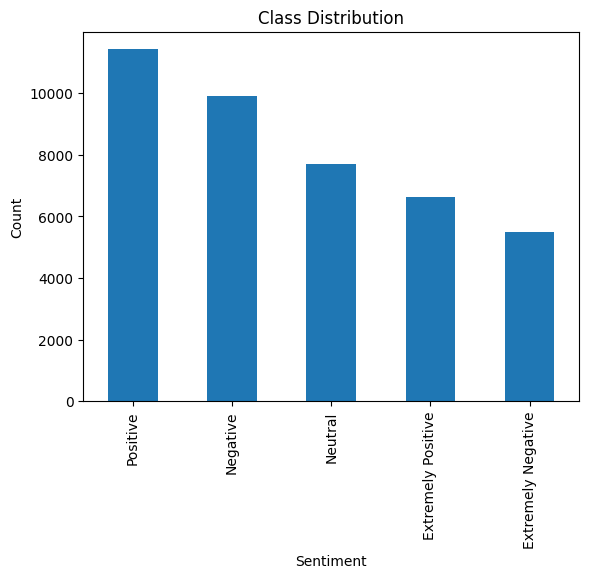

In [19]:
import matplotlib.pyplot as plt

df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# so the model simply learnt to predict 'positive',
# possibly because it's the most populated class


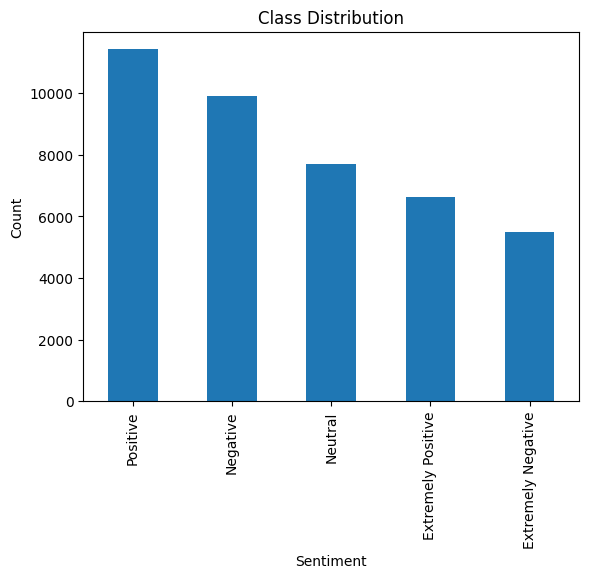

Epoch 1/10, Loss: 1.577478936508631
Validation Loss: 1.5738392666328784, Validation Accuracy: 0.27781827016520894
Epoch 2/10, Loss: 1.5763967718396867
Validation Loss: 1.5741382033325906, Validation Accuracy: 0.27781827016520894
Epoch 3/10, Loss: 1.576389920143854
Validation Loss: 1.5730421695598336, Validation Accuracy: 0.27781827016520894
Epoch 4/10, Loss: 1.5760729594411378
Validation Loss: 1.5737043392750645, Validation Accuracy: 0.27781827016520894
Epoch 5/10, Loss: 1.576194074225727
Validation Loss: 1.572794004004131, Validation Accuracy: 0.27781827016520894
Epoch 6/10, Loss: 1.5761724519312557
Validation Loss: 1.5733616273532542, Validation Accuracy: 0.27781827016520894
Epoch 7/10, Loss: 1.5761382381700566
Validation Loss: 1.5727616885835811, Validation Accuracy: 0.27781827016520894
Epoch 8/10, Loss: 1.5758863679405783
Validation Loss: 1.5741244272668233, Validation Accuracy: 0.27781827016520894
Epoch 9/10, Loss: 1.5759260631279532
Validation Loss: 1.5728499676830086, Validation

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import re
import nltk
from transformers import AutoTokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Load and preprocess the dataset
df = pd.read_csv('/kaggle/input/tweet-sentiment-analysis-ssn/train.csv', encoding='latin1')
df = df[["UserName", "OriginalTweet", "Sentiment"]]

# Encode the sentiment labels
label_encoder = LabelEncoder()
df['SentimentNumeric'] = label_encoder.fit_transform(df['Sentiment'])

# Check class distribution
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Define the function to clean text
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove usernames
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters and numbers
    return text

df['TweetCleaned'] = df['OriginalTweet'].apply(clean_text)

# Tokenize the tweets using BERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
df['TokenizedTweet'] = df['TweetCleaned'].apply(tokenizer.tokenize)

# Load GloVe embeddings
def load_glove_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

glove_file_path = '/kaggle/input/glove-embeddings-100d/glove.6B.100d.txt'
glove_vectors = load_glove_embeddings(glove_file_path)

embedding_dim = 100
def get_pretrained_word_vector(word):
    return glove_vectors.get(word, np.zeros(embedding_dim))

df['TweetVectors'] = df['TokenizedTweet'].apply(lambda x: [get_pretrained_word_vector(word) for word in x])
max_length = 248  # Based on maximum tweet length
padded_sequences = pad_sequences(df['TweetVectors'].tolist(), maxlen=max_length, padding='post', dtype='float32')

X = np.array(padded_sequences)
y = df['SentimentNumeric'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

class SentimentLSTM(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, output_dim, n_layers=2, bidirectional=True):
        super(SentimentLSTM, self).__init__()
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, batch_first=True, bidirectional=bidirectional)
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        h_0 = torch.zeros(2 * n_layers if self.lstm.bidirectional else n_layers, x.size(0), hidden_dim).to(x.device)
        c_0 = torch.zeros(2 * n_layers if self.lstm.bidirectional else n_layers, x.size(0), hidden_dim).to(x.device)
        out, _ = self.lstm(x, (h_0, c_0))
        out = self.fc(self.relu(out[:, -1, :]))
        return out

    def predict(self, x):
        with torch.no_grad():
            out = self.forward(x)
            probabilities = nn.functional.softmax(out, dim=1)
        return probabilities

# Define model parameters
hidden_dim = 128
output_dim = len(np.unique(y_train))
n_layers = 2
bidirectional = True

# Create the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SentimentLSTM(embedding_dim, hidden_dim, output_dim, n_layers=n_layers, bidirectional=bidirectional).to(device)

# Defining loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)  # Increased learning rate

# Create DataLoader for batching or else notebook crashes
batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Training the model
num_epochs = 10
max_grad_norm = 1.0  # Gradient clipping

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        running_loss += loss.item()
    avg_loss = running_loss / len(train_loader)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss}')
    
    # Validation phase
    model.eval()
    val_running_loss = 0.0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(targets.cpu().numpy())
    avg_val_loss = val_running_loss / len(test_loader)
    val_acc = np.mean(np.array(all_preds) == np.array(all_labels))
    print(f'Validation Loss: {avg_val_loss}, Validation Accuracy: {val_acc}')

# Evaluate the model
model.eval()
all_preds = []
all_probs = []
all_labels = []
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        probabilities = model.predict(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_probs.extend(probabilities.cpu().numpy())
        all_labels.extend(targets.cpu().numpy())

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(all_labels, all_preds, target_names=label_encoder.classes_))

# Show 10 examples of predictions vs actual tweets with probabilities
import numpy as np

indices = np.random.choice(len(X_test_tensor), 10, replace=False)
model.eval()
with torch.no_grad():
    for i in indices:
        input_tensor = X_test_tensor[i].unsqueeze(0).to(device)
        target = y_test_tensor[i].item()
        output = model(input_tensor)
        probabilities = model.predict(input_tensor).squeeze()
        predicted = torch.argmax(probabilities).item()

        # Decode the sentiment labels back to original labels
        predicted_label = label_encoder.inverse_transform([predicted])[0]
        actual_label = label_encoder.inverse_transform([target])[0]

        # Get the original tweet using the index from the DataFrame
        original_tweet = df.iloc[i]['OriginalTweet']

        print(f"Original Tweet: {original_tweet}")
        print(f"Actual Sentiment: {actual_label}")
        print(f"Predicted Sentiment: {predicted_label}")
        print(f"Probabilities: {probabilities.cpu().numpy()}")
        print("\n")
